In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (6666/6666), done.
     |████████████████████████████████| 636 kB 5.2 MB/s 


In [2]:
!wget -O incredibles.zip https://github.com/chulminkw/DLCV/blob/master/incredibles.zip?raw=true
!mkdir /content/incredibles
!unzip incredibles.zip -d /content/incredibles

--2021-09-28 10:00:53--  https://github.com/chulminkw/DLCV/blob/master/incredibles.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/incredibles.zip [following]
--2021-09-28 10:00:53--  https://github.com/chulminkw/DLCV/raw/master/incredibles.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/incredibles.zip [following]
--2021-09-28 10:00:53--  https://raw.githubusercontent.com/chulminkw/DLCV/master/incredibles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [3]:
!wget -O /content/incredibles/incredibles.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml

--2021-09-28 10:00:54--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘/content/incredibles/incredibles.yaml’

/content/incredible 100%[===================>]     190  --.-KB/s    in 0s      

2021-09-28 10:00:54 (9.67 MB/s) - ‘/content/incredibles/incredibles.yaml’ saved [190/190]



In [4]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

 텐서플로로배우는딥러닝  'My Drive'			        ultra_workdir
'2020년 공부.zip'	  object-detection-and-tracking.ipynb   Untitled0.ipynb
'Colab Notebooks'	  pet				        공모전.zip
'Computer Vision'	  test.csv			        공부파일.zip
 MOS.zip		  tf_idf.ipynb
mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [6]:
!cd yolov3; python train.py --img 640 --batch 8 --epochs 100 --data /content/incredibles/incredibles.yaml --weight yolov3.pt \
                        --project=/mydrive/ultra_workdir --name incredibles --exist-ok

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/incredibles/incredibles.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=True, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='incredibles', noautoanchor=False, nosave=False, notest=False, project='/mydrive/ultra_workdir', quad=False, rect=False, resume=False, save_dir='/mydrive/ultra_workdir/incredibles', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov3.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir /mydrive/ultra_workdir', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, moment

In [5]:
 !cd /content/yolov3; python detect.py --source /content/incredibles/images/train/incredible_001.jpg \
                                       --weight /content/drive/MyDrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                                       --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=2, max_det=1000, name='run_image', nosave=False, project='/content/data/output', save_conf=False, save_crop=False, save_txt=False, source='/content/incredibles/images/train/incredible_001.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/ultra_workdir/incredibles/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.9 GFLOPS
image 1/1 /content/incredibles/images/train/incredible_001.jpg: 640x448 1 dash, 1 violet, Done. (0.149s)
Results saved to /content/data/output/run_image
Done. (0.457s)


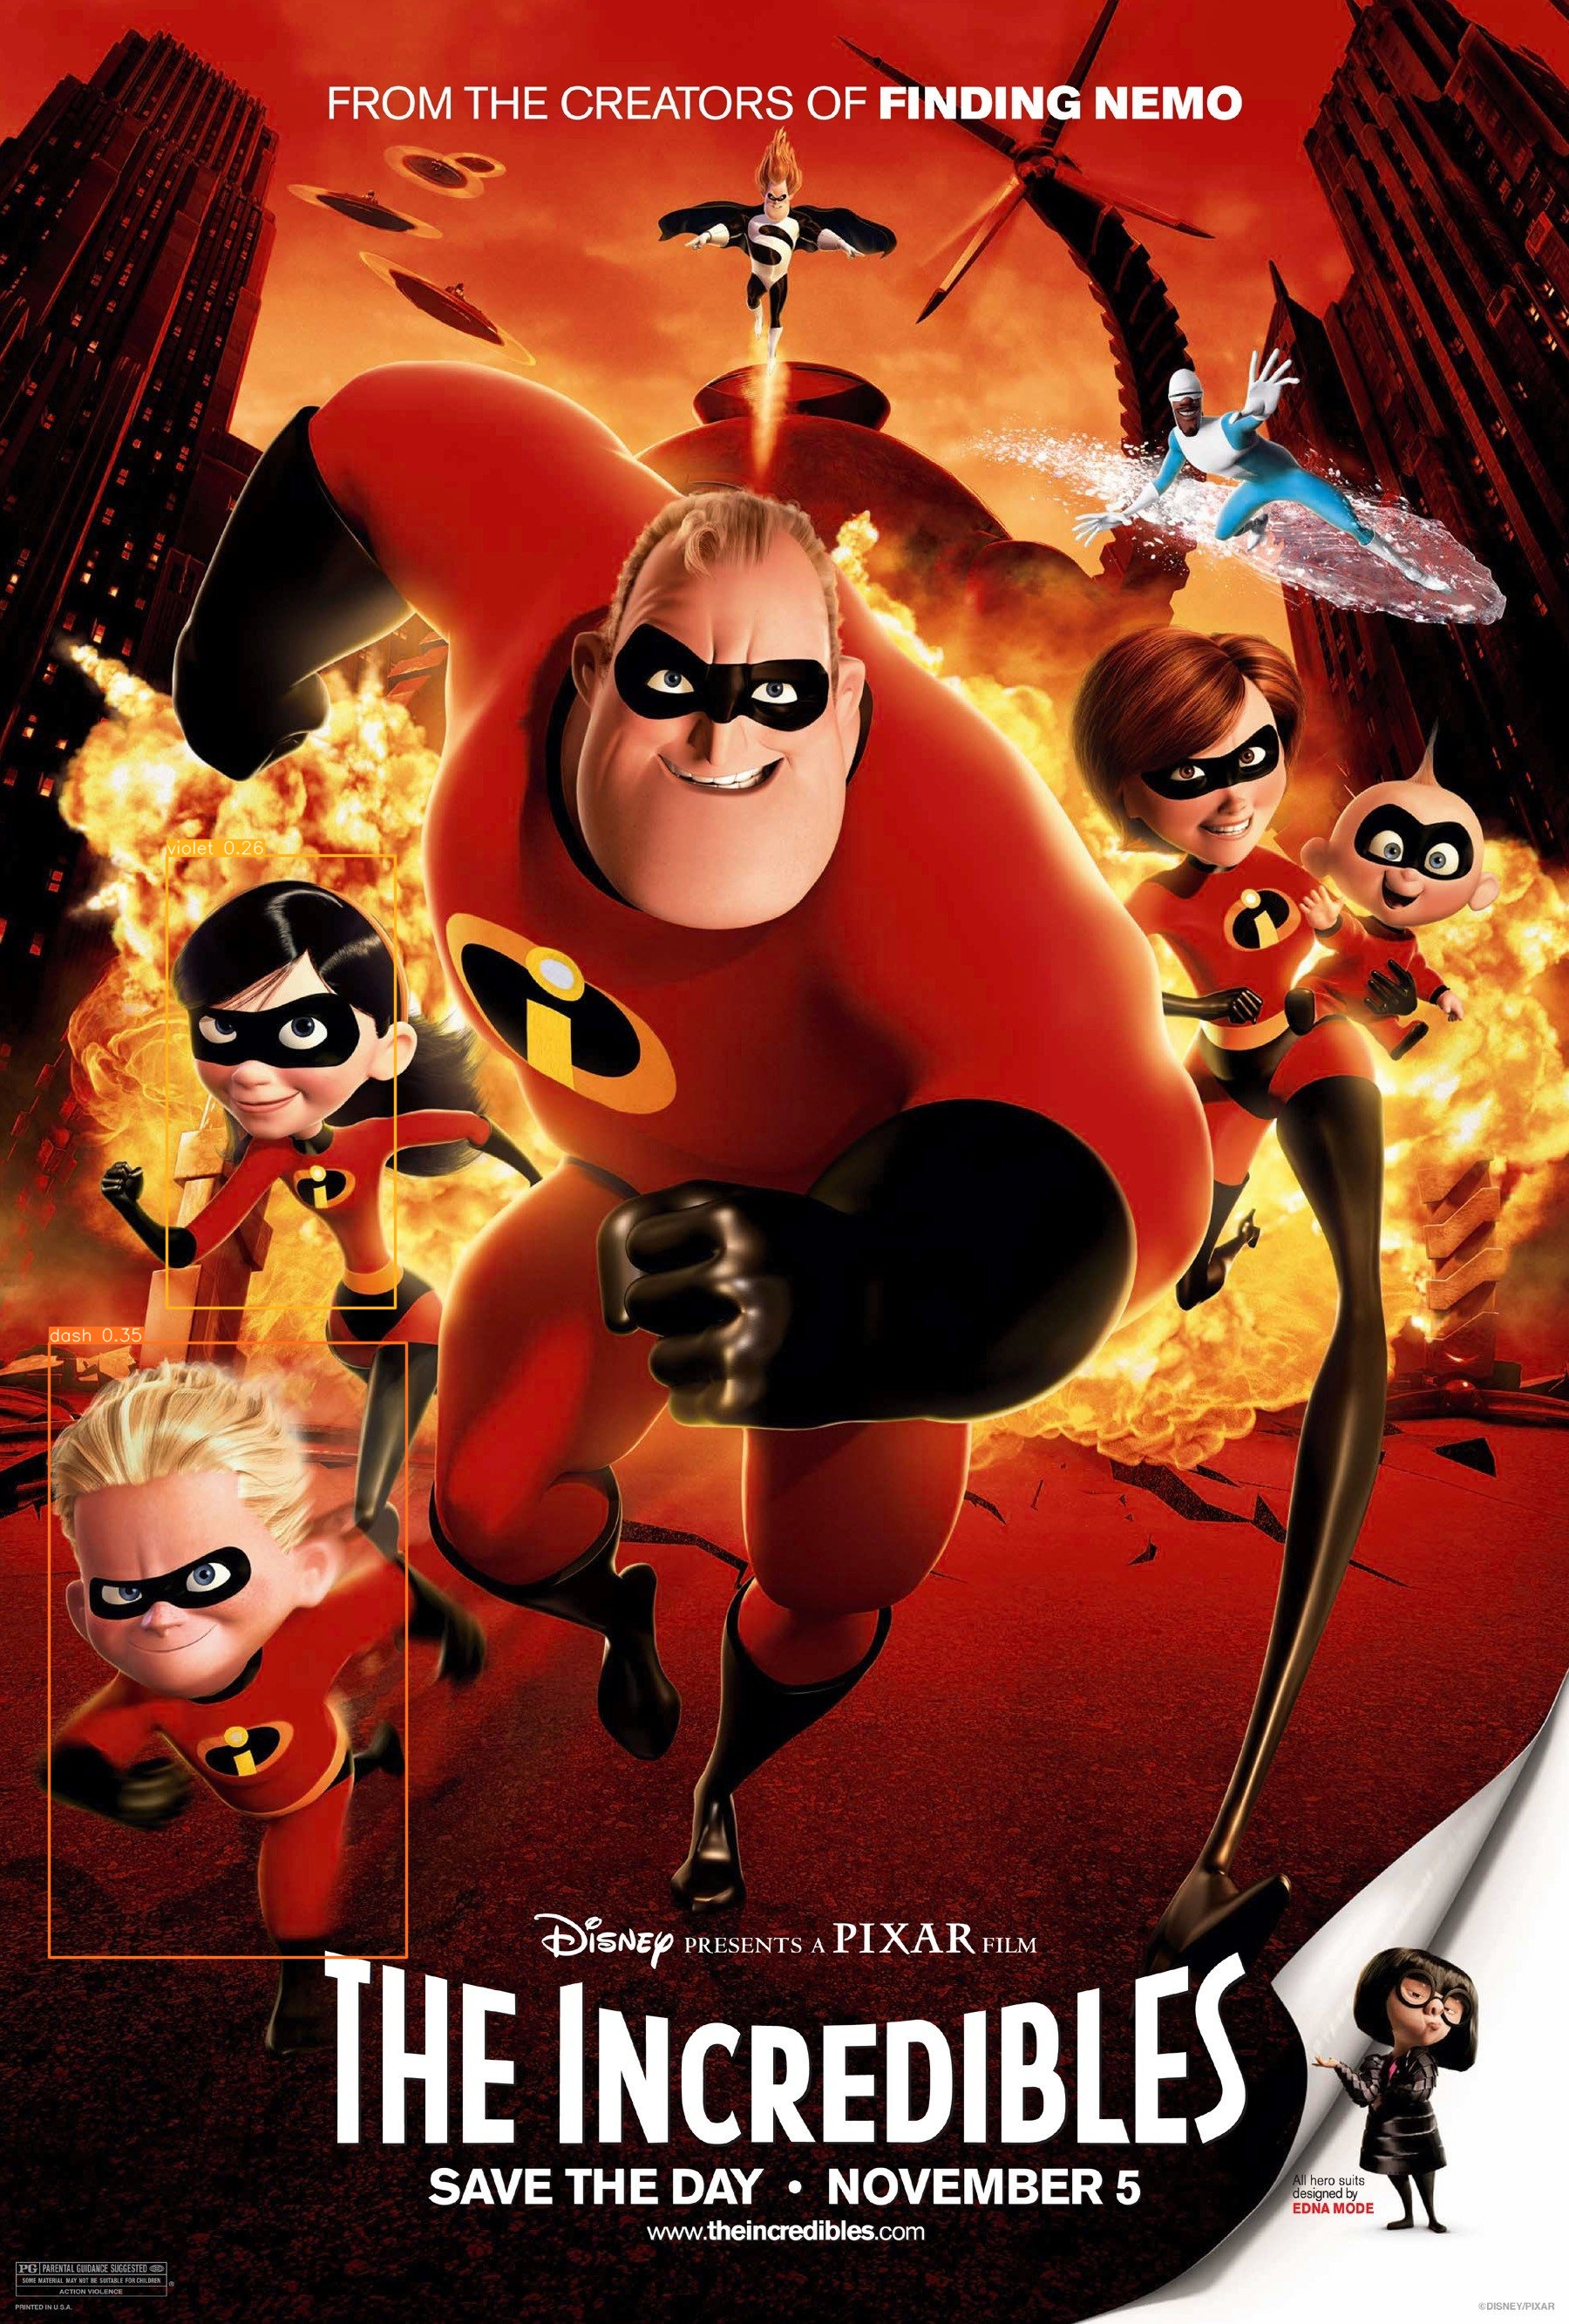

In [8]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/incredible_001.jpg', width=800)

In [9]:
!wget -O /content/incredibles/incredibles.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true

--2021-09-28 10:04:59--  https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4 [following]
--2021-09-28 10:04:59--  https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4 [following]
--2021-09-28 10:04:59--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

In [10]:
!cd /content/yolov3;python detect.py --source /content/incredibles/incredibles.mp4 \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=2, max_det=1000, name='run_image', nosave=False, project='/content/data/output', save_conf=False, save_crop=False, save_txt=False, source='/content/incredibles/incredibles.mp4', update=False, view_img=False, weights=['/mydrive/ultra_workdir/incredibles/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.9 GFLOPS
video 1/1 (1/589) /content/incredibles/incredibles.mp4: 288x640 Done. (0.083s)
video 1/1 (2/589) /content/incredibles/incredibles.mp4: 288x640 Done. (0.080s)
video 1/1 (3/589) /content/incredibles/incredibles.mp4: 288x640 Done. (0.074s)
video 1/1 (4/589) /content/incredibles/incredibles.mp4: 288x640 Done. (0.073s)
video 1/1 (5/589) /content/incredibles/incredibles.mp4: 28